<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/DROPm_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of the DROPm vs. count data

C. Lizarraga (04/14/2023)

In [1]:
# Load needed libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.stattools import medcouple # Skewed datasets
from scipy.stats import kstest # Kolmogorov-Smirnov Normality test



### Reading the data and transform

In [ ]:
# Read the original data

df0 = pd.read_csv('dropm.txt', sep='\s+', header=0)
df0.head()

,DROP,count
0,-62,1
1,-55,1
2,-50,1
3,-47,1
4,-43,3


In [ ]:
# Reflect to positive values
# Possibly it's a decaying exponential (?)

df0['DROP'] *= -1
df0.head()

,DROP,count
0,62,1
1,55,1
2,50,1
3,47,1
4,43,3


In [ ]:
# Check genera information

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DROP    41 non-null     int64
 1   count   41 non-null     int64
dtypes: int64(2)
memory usage: 784.0 bytes


In [ ]:
# Create a sequential data column

df1 = pd.DataFrame(np.arange(0,63), columns=['DROP'])
df1.head()

,DROP
0,0
1,1
2,2
3,3
4,4


In [ ]:
df1.tail()

,DROP
58,58
59,59
60,60
61,61
62,62


In [ ]:
# Merge original data df0 and sequential data df1
# Create a new dataframe combining two previous dataframe

df_tmp = pd.merge_ordered(df1, df0, fill_method="ffill", left_by="DROP")
df_tmp.head(20)


,DROP,count
0,0,1361.0
1,1,89.0
2,2,114.0
3,3,111.0
4,4,69.0
5,5,130.0
6,6,80.0
7,7,58.0
8,8,71.0
9,9,8.0


In [ ]:
df_tmp.tail(10)

,DROP,count
53,53,NaN
54,54,NaN
55,55,1.0
56,56,NaN
57,57,NaN
58,58,NaN
59,59,NaN
60,60,NaN
61,61,NaN
62,62,1.0


In [ ]:
# General dataframe info

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DROP    63 non-null     int64  
 1   count   41 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
# Replace NaN (missing numbers) with zero

df_tmp = df_tmp.fillna(0)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DROP    63 non-null     int64  
 1   count   63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
df_tmp.tail()

,DROP,count
58,58,0.0
59,59,0.0
60,60,0.0
61,61,0.0
62,62,1.0


In [ ]:
# Basic statistics

df_tmp.describe()

,DROP,count
count,63.000000,63.000000
mean,31.000000,36.761905
std,18.330303,172.401886
min,0.000000,0.000000
25%,15.500000,0.000000
50%,31.000000,1.000000
75%,46.500000,9.000000
max,62.000000,1361.000000


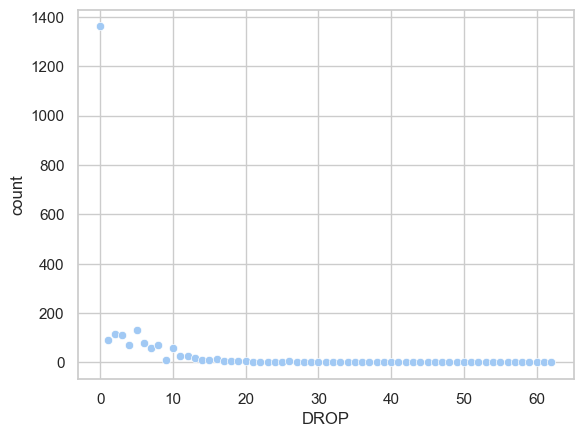

In [ ]:
# Scatterplot of original dataset (No transformation)

sns.set_theme(style="whitegrid", palette="pastel")
sns.scatterplot(data=df_tmp, x="DROP", y="count");

In [ ]:
# General dataset statistics

ave_count = df_tmp['count'].mean()
std_count = df_tmp['count'].std()
skew_count = df_tmp['count'].skew()
kurt_count = df_tmp['count'].kurtosis()

print('Mean=', ave_count)
print('StdDev=', std_count)
print('Skewness=', skew_count)
print('Kurtosis=', kurt_count)

# lambda = 1/average in exponential distribution
lmbd = 1.0/ave_count
print('Lambda=', lmbd)

Mean= 36.76190476190476
StdDev= 172.40188554145467
Skewness= 7.548533725204234
Kurtosis= 58.70444671174729
Lambda= 0.027202072538860107


**The data do not a pure exponential probability distribution.**

(See: [Exponential Distribution properties](https://en.wikipedia.org/wiki/Exponential_distribution))


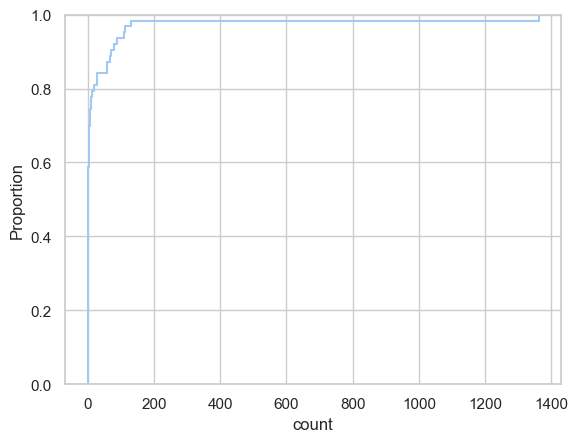

In [ ]:
# Empirical Cummulative Distribution Function

sns.set_theme(style="whitegrid", palette="pastel")
sns.ecdfplot(data=df_tmp, x="count");

### Use a Log transform for the count variable

Since count can have zero values will use $\log (x+1)$ transformation

In [ ]:
# Make a variable transformation for 'count' using Log(x+1) 
# Define a new column of the dataframe df_tmp

df_tmp['transf'] = np.log(df_tmp['count'] + 1.0)
df_tmp.head()

,DROP,count,transf
0,0,1361.0,7.216709
1,1,89.0,4.499810
2,2,114.0,4.744932
3,3,111.0,4.718499
4,4,69.0,4.248495


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DROP    63 non-null     int64  
 1   count   63 non-null     float64
 2   transf  63 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [ ]:
# Replace NaN (missing numbers) with zero
df_tmp = df_tmp.fillna(0)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DROP    63 non-null     int64  
 1   count   63 non-null     float64
 2   transf  63 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [ ]:
# General statistics
df_tmp.describe()

,DROP,count,transf
count,63.000000,63.000000,63.000000
mean,31.000000,36.761905,1.484551
std,18.330303,172.401886,1.711787
min,0.000000,0.000000,0.000000
25%,15.500000,0.000000,0.000000
50%,31.000000,1.000000,0.693147
75%,46.500000,9.000000,2.297560
max,62.000000,1361.000000,7.216709


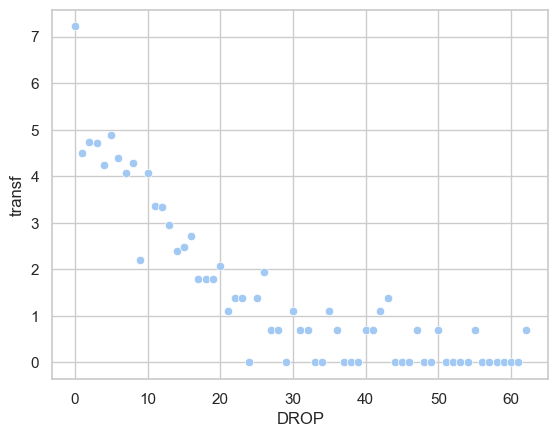

In [ ]:
# Scatterplot in the transformed Log variable

sns.set_theme(style="whitegrid", palette="pastel")
sns.scatterplot(data=df_tmp, x="DROP", y="transf");


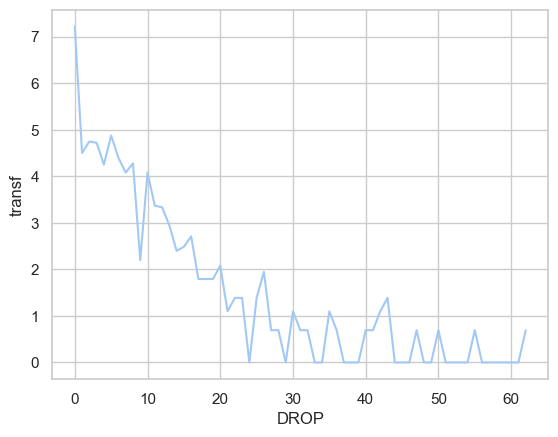

In [ ]:
# Line plot (not good)

sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(data=df_tmp, x="DROP", y="transf");

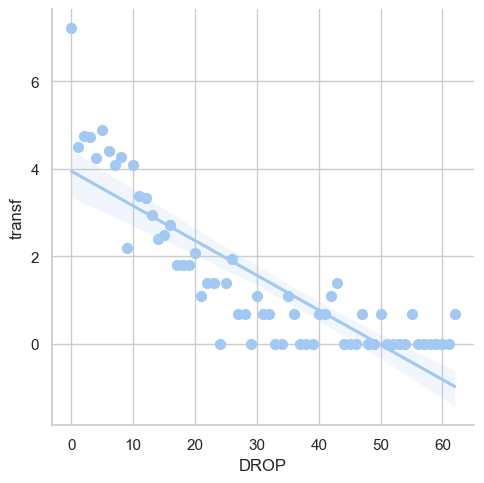

In [ ]:
# Fit a linear function 

sns.set_theme(style="whitegrid", palette="pastel")
sns.lmplot(x="DROP", y="transf", data=df_tmp, x_estimator=np.mean);

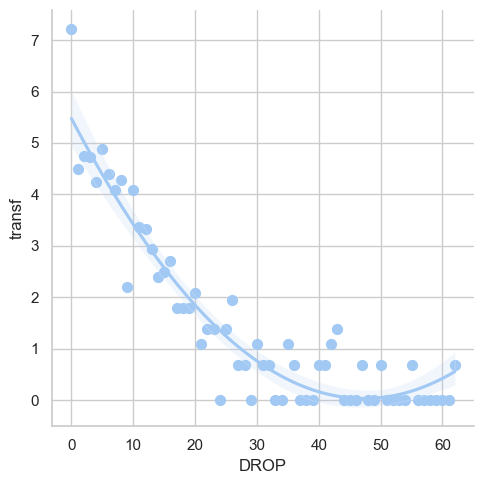

In [ ]:
# Fit a second order polynomial

sns.set_theme(style="whitegrid", palette="pastel")
sns.lmplot(x="DROP", y="transf", data=df_tmp,
           order=2,  x_estimator=np.mean);

Comparison between transformed variable and using simply a log y scale.

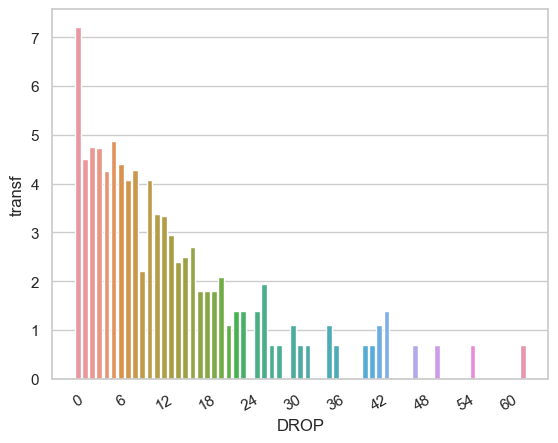

In [ ]:
# Barplot (histogram) of transformed variable

sns.set_theme(style="whitegrid", palette="pastel")
g=sns.barplot(data=df_tmp, x="DROP", y="transf")

# Use Log scale
#g.set_yscale("log")

plt.locator_params(nbins=12, axis='x')

# Rotating X-axis labels
plt.xticks(rotation = 30);


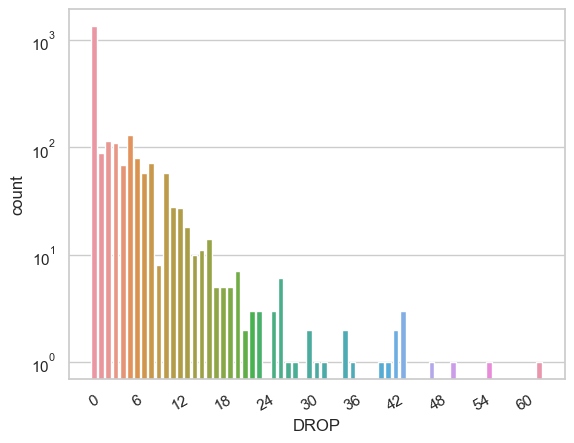

In [ ]:
# For illustration purposes, only used y-log scale in plot
# Barplot (histogram)

sns.set_theme(style="whitegrid", palette="pastel")
g=sns.barplot(data=df_tmp, x="DROP", y="count")

# Use Log scale
g.set_yscale("log")

plt.locator_params(nbins=12, axis='x')

# Rotating X-axis labels
plt.xticks(rotation = 30);

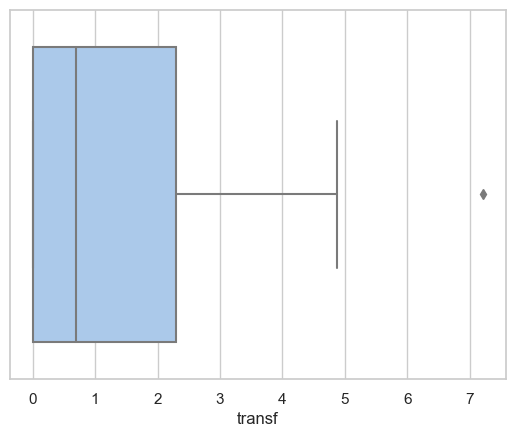

In [ ]:
# Boxplot of the transformed variable

sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(x=df_tmp['transf']);


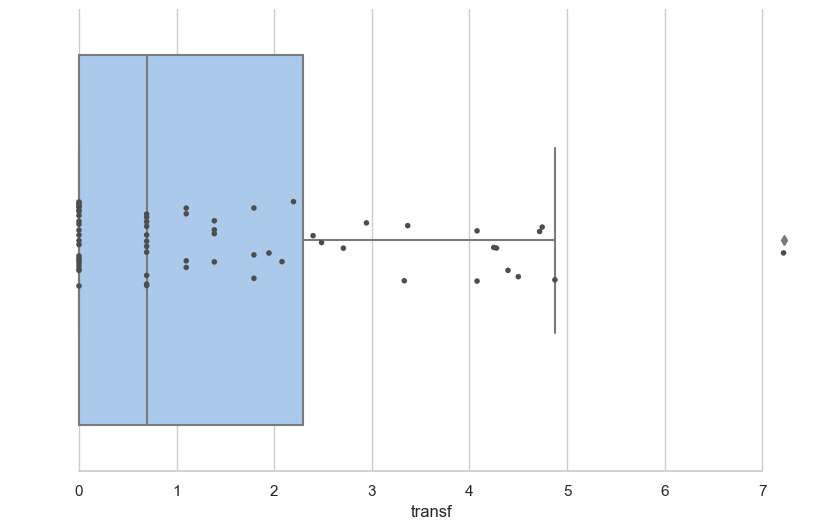

In [ ]:
# Boxplot with scatterplot of transformed data

sns.set_theme(style="whitegrid", palette="pastel")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="transf", data=df_tmp)

# Add in points to show each observation
sns.stripplot(x='transf', data=df_tmp,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel=" ")
sns.despine(trim=True, left=True)

In [ ]:
# Followed paper: An adjusted boxplot for skewed distributions. 
# M. Hubert, E. Vandervieren / Computational Statistics and Data Analysis 52 (2008) 5186–5201
   
# Using statsmodels.medcouple() method

MC = medcouple(df_tmp['transf'])
   
print(MC)


0.48808395038036895


In [ ]:
# Outlier detection method for skewed distributions
# For MC > 0
# [Q1 − 1.5e(−4 MC) IQR; Q3 + 1.5e(+3 MC) IQR]

#calculate quartiles for count column

df_tmp['transf'].quantile([0.25, 0.5, 0.75])


0.25    0.000000
0.50    0.693147
0.75    2.297560
Name: transf, dtype: float64

In [ ]:
Q1 = df_tmp['transf'].quantile([0.25]).values[0]  # Q1
Q2 = df_tmp['transf'].quantile([0.50]).values[0]  # Q2
Q3 = df_tmp['transf'].quantile([0.75]).values[0]  # Q3
IQR = Q3 - Q1
print('Q1, Q2, Q3, IQR', Q1, Q2, Q3, IQR)

Q1, Q2, Q3, IQR 0.0 0.6931471805599453 2.2975599250672953 2.2975599250672953


In [ ]:
# Lower and Upper Fences if MC >  0
# M. Hubert, E. Vandervieren / Computational Statistics and Data Analysis 52 (2008) 5186–5201

LL = Q1 - 1.5 * IQR * np.exp(-4 * MC)
UL = Q3 + 1.5 * IQR * np.exp(3 * MC)
print('LL, UL:', LL, UL)


LL, UL: -0.4891808430052974 17.20059095192427


In [ ]:
# See if there are outliers (There are no extreme values)
df_tmp[df_tmp['transf'] >= UL ]

,DROP,count,transf


Quartiles
Q1 =  0.0
Q2 =  0.6931471805599453
Q3 =  2.2975599250672953


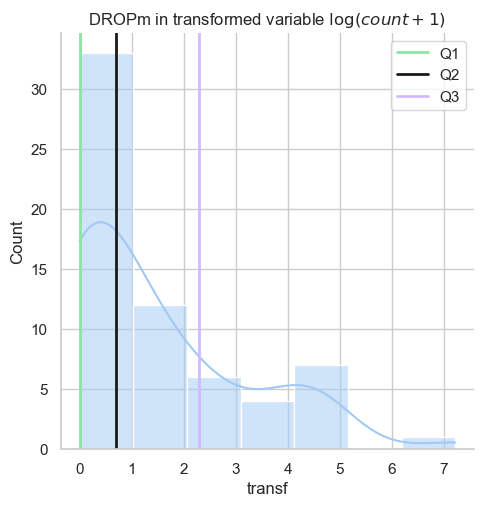

In [ ]:
#plot the distribution of data values

sns.set_theme(style="whitegrid", palette="pastel")

sns.displot(data=df_tmp, x='transf', kde=True).set(title='DROPm in transformed variable $\log(count+1)$')
plt.axvline(x=Q1, linewidth=2, color='g', label='Q1')
plt.axvline(x=Q2, linewidth=2, color='k', label='Q2')
plt.axvline(x=Q3, linewidth=2, color='m', label='Q3')

#plt.axvline(x=UL, linewidth=2, color='r', label='UL', ls='--')
plt.legend();
print('Quartiles')
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)


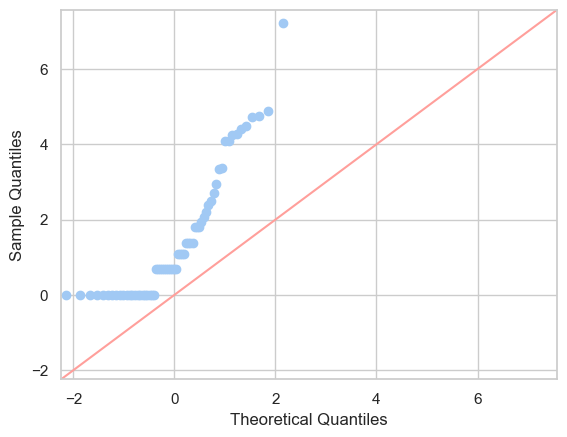

In [ ]:
#create Q-Q plot with 45-degree line added to plot

sns.set_theme(style="whitegrid", palette="pastel")
fig = sm.qqplot(df_tmp['transf'], line='45')
plt.show()


In [ ]:
# Test normality hypothesis
# perform Kolmogorov-Smirnov test

kstest(df_tmp['transf'], 'norm')

# if p-value < 0.5 we can reject the hypothesis that the data follow a normal distribution

KstestResult(statistic=0.5, pvalue=4.339398723240336e-15, statistic_location=0.0, statistic_sign=-1)

In [ ]:
df_tmp.head()

,DROP,count,transf
0,0,1361.0,7.216709
1,1,89.0,4.499810
2,2,114.0,4.744932
3,3,111.0,4.718499
4,4,69.0,4.248495


In [ ]:
df_tmp.tail()

,DROP,count,transf
58,58,0.0,0.000000
59,59,0.0,0.000000
60,60,0.0,0.000000
61,61,0.0,0.000000
62,62,1.0,0.693147


In [ ]:
df_tmp.head()

,DROP,count,transf
0,0,1361.0,7.216709
1,1,89.0,4.499810
2,2,114.0,4.744932
3,3,111.0,4.718499
4,4,69.0,4.248495


## Use a z-scale transform

Explore if new results have better interpretation 

In [ ]:
# copy the data
df_z_scaled = df_tmp.copy()

# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                        df_z_scaled[column].mean()) / df_z_scaled[column].std()

# view normalized data
display(df_z_scaled)


,DROP,count,transf
0,-1.691189,7.681111,3.348639
1,-1.636634,0.303002,1.761468
2,-1.582080,0.448012,1.904665
3,-1.527525,0.430611,1.889223
4,-1.472971,0.186994,1.614654
...,...,...,...
58,1.472971,-0.213234,-0.867252
59,1.527525,-0.213234,-0.867252
60,1.582080,-0.213234,-0.867252
61,1.636634,-0.213234,-0.867252


In [ ]:
# Make a variable transformation for 'count' using Log(x+1) 

df_z_scaled['transfz'] = np.log(df_z_scaled['count'] + 1.0)
df_z_scaled.head()

,DROP,count,transf,transfz
0,-1.691189,7.681111,3.348639,2.161150
1,-1.636634,0.303002,1.761468,0.264671
2,-1.582080,0.448012,1.904665,0.370192
3,-1.527525,0.430611,1.889223,0.358101
4,-1.472971,0.186994,1.614654,0.171424


In [ ]:
# General statistics
df_z_scaled.describe()

,DROP,count,transf,transfz
count,63.000000,6.300000e+01,6.300000e+01,63.000000
mean,0.000000,4.493760e-17,-2.907727e-17,-0.112509
std,1.000000,1.000000e+00,1.000000e+00,0.338727
min,-1.691189,-2.132338e-01,-8.672521e-01,-0.239824
25%,-0.845594,-2.132338e-01,-8.672521e-01,-0.239824
50%,0.000000,-2.074334e-01,-4.623261e-01,-0.232479
75%,0.845594,-1.610302e-01,4.749473e-01,-0.175604
max,1.691189,7.681111e+00,3.348639e+00,2.161150


In [ ]:
# General dataset statistics

ave_count_z = df_z_scaled['transfz'].mean()
std_count_z = df_z_scaled['transfz'].std()
skew_count_z = df_z_scaled['transfz'].skew()
kurt_count_z = df_z_scaled['transfz'].kurtosis()

print('Mean=', ave_count_z)
print('StdDev=', std_count_z)
print('Skewness=', skew_count_z)
print('Kurtosis=', kurt_count_z)

# lambda = 1/average in exponential distribution
lmbd_z = 1.0/ave_count_z
print('Lambda=', lmbd_z)

Mean= -0.11250864470864669
StdDev= 0.3387269225823324
Skewness= 5.2366568151876365
Kurtosis= 33.261537655850695
Lambda= -8.88820590266293


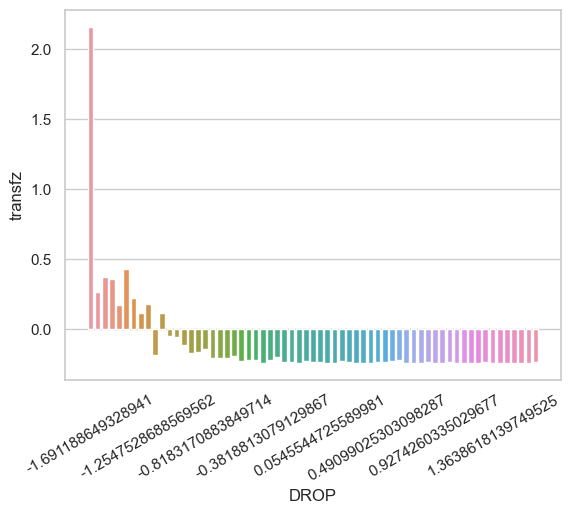

In [ ]:
# Barplot (histogram)
sns.set_theme(style="whitegrid", palette="pastel")

g=sns.barplot(data=df_z_scaled, x="DROP", y="transfz")

# Use Log scale
#g.set_yscale("log")

plt.locator_params(nbins=8, axis='x')

# Rotating X-axis labels
plt.xticks(rotation = 30);


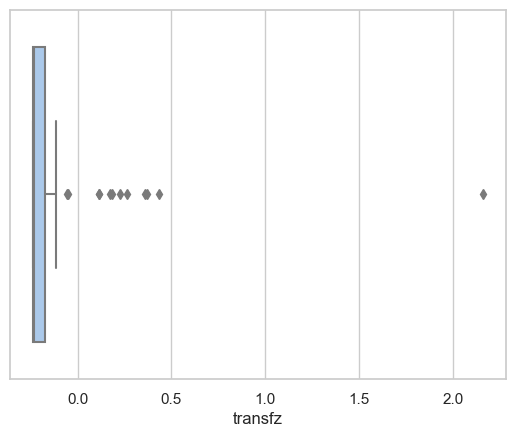

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(x=df_z_scaled['transfz']);

[Text(0, 0.5, ' ')]

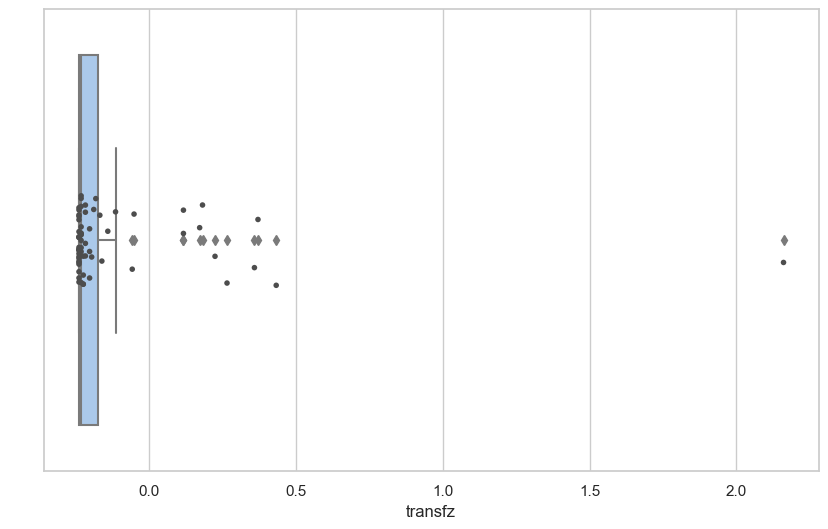

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="transfz", data=df_z_scaled)

# Add in points to show each observation
sns.stripplot(x='transfz', data=df_z_scaled,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel=" ")
#sns.despine(trim=True, left=True)


In [ ]:
# Using statsmodels.medcouple() method

MCzt = medcouple(df_z_scaled['transfz'])
   
print(MCzt)

0.8504417084298692


In [ ]:
Q1zt = df_z_scaled['transfz'].quantile([0.25]).values[0]  # Q1
Q2zt = df_z_scaled['transfz'].quantile([0.50]).values[0]  # Q2
Q3zt = df_z_scaled['transfz'].quantile([0.75]).values[0]  # Q3
IQRzt = Q3zt - Q1zt
print('Q1zt, Q2zt, Q3zt, IQRzt', Q1zt, Q2zt, Q3zt, IQRzt)

Q1zt, Q2zt, Q3zt, IQRzt -0.2398241196296867 -0.23247870580981891 -0.1756044317437348 0.06421968788595189


In [ ]:
# Lower and Upper Fences if MC >  0
# M. Hubert, E. Vandervieren / Computational Statistics and Data Analysis 52 (2008) 5186–5201
LLzt = Q1zt - 1.5 * IQRzt * np.exp(-4 * MCzt)
ULzt = Q3zt + 1.5 * IQRzt * np.exp(3 * MCzt)
print('LLzt, ULzt:', LLzt, ULzt)


LLzt, ULzt: -0.24303327604283814 1.0597337735001864


Quartiles (z-scale)
Q1zt =  -0.2398241196296867
Q2zt =  -0.23247870580981891
Q3zt =  -0.1756044317437348


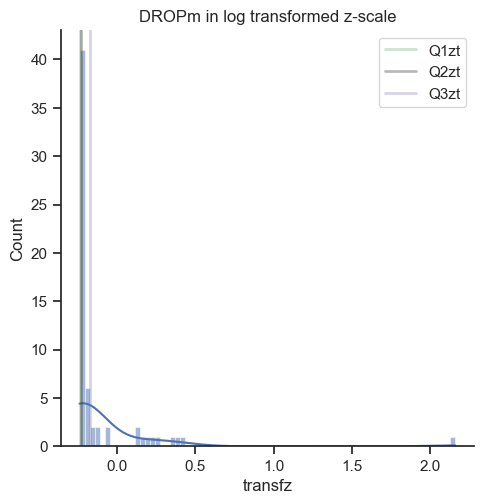

In [ ]:
#plot the distribution of data values

sns.displot(data=df_z_scaled, x='transfz', kde=True).set(title='DROPm in log transformed z-scale')
plt.axvline(x=Q1zt, linewidth=2, color='g', label='Q1zt', alpha=0.3)
plt.axvline(x=Q2zt, linewidth=2, color='k', label='Q2zt', alpha=0.3)
plt.axvline(x=Q3zt, linewidth=2, color='m', label='Q3zt', alpha=0.3)

#plt.axvline(x=UL, linewidth=2, color='r', label='ULzt', ls='--')
plt.legend();
print('Quartiles (z-scale)')
print('Q1zt = ', Q1zt)
print('Q2zt = ', Q2zt)
print('Q3zt = ', Q3zt)
